# 1. Relative Frequency, Chebyshev's inequality and Chernoff bound

We first need to import the libraries that we are going to use in this notebook.

1. The *numpy* Python library is used for mathematical functions, such as our random number generators;
2. The *matplotlib* Python library is used to plot graphics and visualize data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

Let's define our Bernoulli variable $X_j$ simulating the flip of the $j$-th coin:

$$
X_j =
\begin{cases}
1 & \text{if H with probability $p$} \\
0 & \text{if T}
\end{cases}
$$

We know that in a Bernoulli random variable we have that:


*   $\mathbb{E} \left[ X_j \right] = p$, and
*   $\mathbb{Var} \left[ X_j \right] = p (1 - p)$.







In [15]:
# -- function that simulates a coin flipping (Bernoulli variable)
def coin_flip(p):
    if np.random.rand() < p:
        return 1
    else:
        return 0

## Relative Frequency

Now, let's try to estimate the probability $p$ by computing the relative frequency simulating the flip of our coin for $n = 10000$ times.

We want to compute and plot the estimated probability for each of such flip:

\begin{equation}
  \tilde{p_i} = \sum_{j=1}^{i} \frac{X_j}{i}
\end{equation}

for $i = 1, ..., n$

In [21]:
# -- let's set our parameters
n = 10000
p = np.random.rand()
def estimated_probability(n_flips,p):
    estimated_p=np.zeros(n_flips)
    head_count = 0
    for i in range(n):
        head_count += coin_flip(p)
        estimated_p[i] = head_count/(i+1)
    return estimated_p   
estimated_p = estimated_probability(n,p)

In [4]:
# -- function that estimates our probability at each flip, by counting the heads flipped at such flip

Now, let's plot the estimated probability for each flip

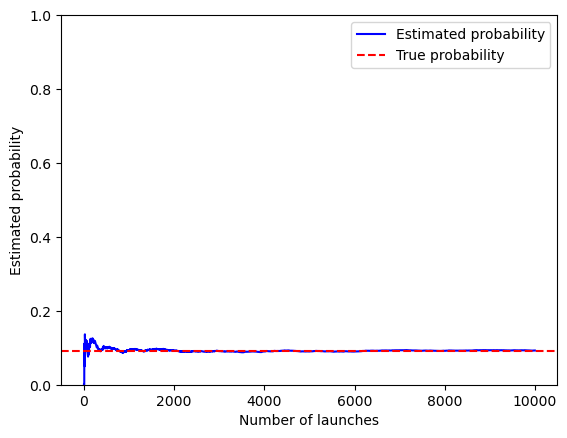

In [22]:
# -- plot the estimated probability
plt.plot(estimated_p, color = 'b', label='Estimated probability')

# plot true value
plt.axhline(y=p, color='r', linestyle='--', label='True probability')
plt.ylim(0, 1)

plt.xlabel('Number of launches')
plt.ylabel('Estimated probability')
plt.legend()

In [ ]:
# -- let' see what is actually the true probability

Next, we want to compute the mean and the variance of our random variable $\tilde{p_n}$, that we recall is defined as:

\begin{equation}
  \tilde{p_n} = \sum_{j = 1}^{n} \frac{X_j}{n}
\end{equation}

So, we have that the expected value at the end of our $n$ flips is:

\begin{align}
  \mathbb{E}\left[\tilde{p_n}\right] &= \mathbb{E} \left[ \sum_{j = 1}^{n} \frac{X_j}{n} \right] = \frac{1}{n} \ \mathbb{E} \left[ \sum_{j = 1}^{n} X_j \right] = \\
  & = \frac{1}{n} \ \sum_{j = 1}^{n} \ \mathbb{E} \left[ X_j \right] = \frac{1}{n} \ \sum_{j = 1}^{n} \ p = p
\end{align}

and the variance is computed as:

\begin{align}
  \mathbb{Var} \left[\tilde{p_n}\right] &= \mathbb{Var} \left[ \sum_{j = 1}^{n} \frac{X_j}{n} \right] = \frac{1}{n^2} \ \mathbb{Var} \left[ \sum_{j = 1}^{n} X_j \right] = \\
  & = \frac{1}{n^2} \ \sum_{j = 1}^{n} \ \mathbb{Var} \left[ X_j \right] = \frac{1}{n^2} \ n \ \mathbb{Var} \left[ X_j \right] = \frac{p (1 - p)}{n}
\end{align}

Let's analyze, in our experiments, the computations of the empirical mean:

In [24]:
X_mean = sum(estimated_p)/n
print('Mean of X = ', X_mean)
print('p = ', p)

Mean of X =  0.09237949394030863
p =  0.0923385947687978


## Chebyshev's inequality

As you have seen during the lectures, given a random variable $X$ with $\mathbb{E}\left[X\right] = \mu$ and $\mathbb{Var}\left[X\right] = \sigma^2$, and a fixed constant $\varepsilon > 0 $, the Chebyshev's inequality states:

\begin{equation}
  \mathbb{P}\left[ \left| X - \mu \right| > \varepsilon \right] \leq \frac{\sigma^2}{\varepsilon^2}
\end{equation}

In our example, we want to plot the Chebyshev bounds given by the above inequality for the estimated probability in each of our coin flips.

So, if we let:

  * $X = \tilde{p_i}$
  * $\mu = \mathbb{E}\left[ \tilde{p_i} \right] = p$
  * $\sigma_i^2 = \mathbb{Var}\left[ \tilde{p_i} \right] = \frac{p (1 - p)}{i}$
  * $\varepsilon = \varepsilon\mu$

we obtain:

\begin{equation}
  \mathbb{P}\left[ | \tilde{p_i} - p | > \varepsilon p \right] \leq \frac{p (1 - p)}{i \varepsilon^2 p^2}
\end{equation}



Let's compute and plot the probability bounds of being far from the true mean, for each of our $\tilde{p_i}$ random variables, $i = 1, ..., n$.

Let's fix the right-hand-side of the above inequality, by letting $\delta = \frac{p (1 - p)}{i \varepsilon^2 p^2} = 0.05$, that corresponds to the probability of obtaining "bad" estimates. We need to compute the distance from the mean (i.e., $\varepsilon p$) for each flip $i$, that is:

\begin{equation}
  ɛ p = \sqrt{\frac{p(1 - p)}{\delta i}}
\end{equation}

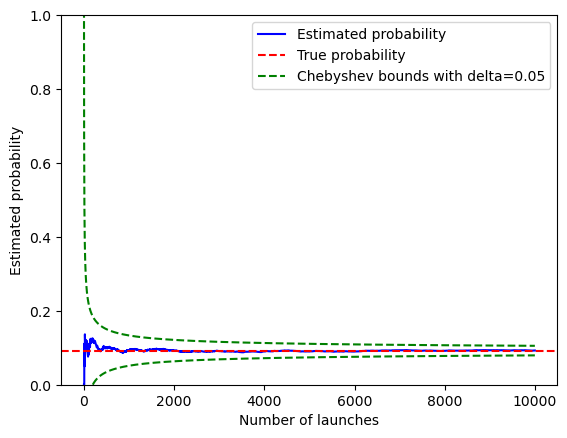

In [27]:
#fix delta
delta=0.05
flips=np.array([i+1 for i in range(n)])

plt.plot(estimated_p, color = 'b', label='Estimated probability')
# -- plot true value
plt.axhline(y = p, color = 'r', linestyle = '--', label='True probability')

# -- Chebyshev's bounds
# -- compute the Chebyshev values for each flip
cheb_values=np.sqrt(p*(1-p)/(flips*delta))
plt.plot(p+cheb_values, color = 'g', linestyle='--')
plt.plot(p-cheb_values, color = 'g', linestyle='--', label=f'Chebyshev bounds with delta={delta}')
plt.ylim(0, 1)


plt.xlabel('Number of launches')
plt.ylabel('Estimated probability')
plt.legend()

Try with different values of $\delta$, that reflect the probability of optaining good approximation.

## Chernoff's bound

Now, we are going to analyze a more precise tool for the approximation guarantees: the Chernoff's bound (you will use it in the next lectures).




**Chernoff's bound:**
Given a random variable $X = \sum_{i=1}^n X_i$, written as a sum of Bernoulli random variables $X_i$ with $\mu = \mathbb{E} \left[X \right]$, and a small constant $\varepsilon \in (0, 1)$, we have that:

\begin{equation}
  \mathbb{P}\left[ \left| X - \mu \right| > \varepsilon \mu \right] \leq 2 e^{\frac{\varepsilon^2 \mu}{3}}
\end{equation}

In our example, we need to rearrange the variables. In particular, we want (as done for the Chebyshev's bounds) to compute the following approximation:

\begin{align}
  & \mathbb{P}\left[ | \tilde{p_i} - p | > \varepsilon p \right] \\
  & = \mathbb{P}\left[ \big | \sum_{j=1}^i \frac{X_j}{i} - p \ \big | > \varepsilon p \right] \\
  & = \mathbb{P}\left[ \big | \sum_{j=1}^i X_j - p \ i \ \big | > \varepsilon p \ i \right] \\
  & \leq 2 e^{\varepsilon^2 p\ i / 3}
\end{align}

Also in this case, let's fix $\delta = 2 e^{\varepsilon^2 p\ i / 3} = 0.05$, the probability of optaining "bad" estimates.



We can similarly plot the Chernoff's bounds by computing the distances from the true mean (i.e., $ɛ p$ as defined in the above) for each coin flip.

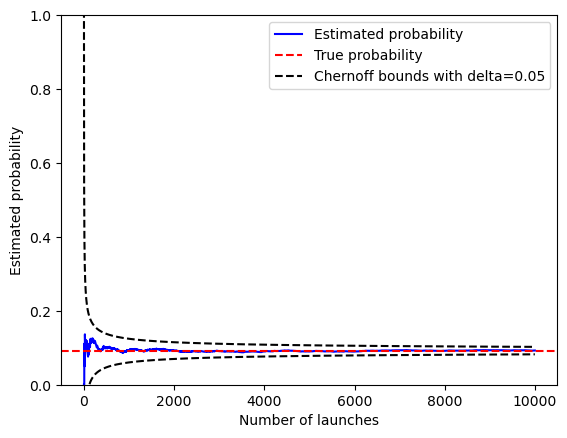

In [28]:
# fix delta

plt.plot(estimated_p, color = 'b', label='Estimated probability')
# plot true value
plt.axhline(y = p, color = 'r', linestyle = '--', label='True probability')

plt.ylim(0, 1)

# -- Chernoff's bounds
# -- compute the chernoff values for each flip
chern_values=np.sqrt(np.abs(np.log(delta/2))*p*3/flips)
plt.plot(p+chern_values, color = 'k', linestyle='--')
plt.plot(p-chern_values, color = 'k', linestyle='--', label=f'Chernoff bounds with delta={delta}')


plt.xlabel('Number of launches')
plt.ylabel('Estimated probability')
plt.legend()

Let's compare Chebyshev's and Chernoff's bounds

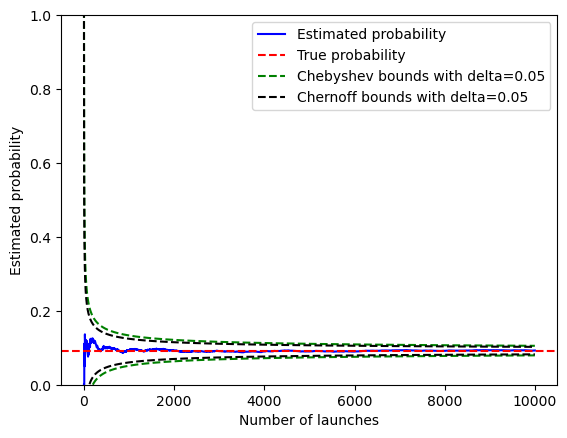

In [29]:
# fix delta

plt.plot(estimated_p, color = 'b', label='Estimated probability')
# plot true value
plt.axhline(y = p, color = 'r', linestyle = '--', label='True probability')

plt.ylim(0, 1)

# -- Chebyshev's bounds

plt.plot(p-cheb_values, color = 'g', linestyle='--')
plt.plot(p+cheb_values, color = 'g', linestyle='--', label=f'Chebyshev bounds with delta={delta}')

# -- Chernoff's bounds

plt.plot(p-chern_values, color = 'k', linestyle='--')
plt.plot(p+chern_values, color = 'k', linestyle='--', label=f'Chernoff bounds with delta={delta}')


plt.xlabel('Number of launches')
plt.ylabel('Estimated probability')
plt.legend()
## Chernoff converges faster than Chebychev

## Law of Large Numbers

From the plots above, we can also see the validiy of the Law of Large Numbers, that states:

\begin{equation}
  \lim_{n\to\infty} \mathbb{P} \left[  \big| \frac{1}{n} \sum_{i = 1}^n X_i - \mu \big| > ɛ \right] = 0.
\end{equation}

# 2. Coin flipping: a Machine Learning case study

We will now exploit the concepts we have introduced to build a simplified Machine Learning case study starting from simple coin flippings. We will consider a coin $j$ as an hypothesis $h$ belonging to our hypothesis set $H$. Each coin $j$ will have an associated probability error $p^{(j)}$, which is not known in advance.

Our aim is to find the coin $j$ that has the smallest error probability $p^{(j)}$ (over all $j$) by empirically counting the number of heads in a series of $n$ flips. In other words, we are trying to find the coin that **minimizes the number of heads** in a series of $n$ flips. Let $\tilde{p_n}^{(j)}$ be the estimated head probability of the $j$-th coin after $n$ flips. We define our training error by means of the $0-1$ loss function as:

\begin{equation}
L(j) = \tilde{p_n}^{(j)}
\end{equation}

which penalizes coins that are more likely to flip head, that is indeed what we are looking for. We will select our best coin (hypothesis) from $H$ by means of the Empirical Risk Minimization (ERM) procedure:

\begin{equation}
ERM_H \in argmin_{\ j \ \in \ H} \ L(j)
\end{equation}

## Empirical Risk Minimization

Let us first define the ERM procedure, given an initial amount of coins (*n_coins*) and the total number of flips $n$ (*n_flips*). We want to obtain in output the coin that minimizes our loss function, which in our case corresponds to the coin with the lowest rate of heads. We will include an additional parameter (*top_k*) to allow the ERM to output the top $k$ best hypotheses found in our hypothesis set $H$. Note that this is not usually feasible in real Machine Learning problems.

In [33]:
# -- function that simulates the Empirical Minimization Risk procedure over a set of coins
def ERM (n_coins,n_flips,top_k=1):#top k is the amount of coins we want to consider good
    loss=np.zeros(n_coins)
    hypotesis = np.zeros(n_coins)
    for i in range(n_coins):
        hypotesis[i]=np.random.rand()
        loss[i]=estimated_probability(n_flips,hypotesis[i])[n_flips-1]
    indexes = np.argsort(loss)
    
    return loss[indexes[:top_k]],hypotesis[indexes[:top_k]]

## A first experiment

We are ready to make our first experiment using the ERM procedure defined above. We will run the ERM procedure several times by varying the number of coins we are considering (i.e., we are modifying the cardinality of $H$), with a fixed amount of flips. Note that the number of **flips** $n$ (*n_flips* in the code) can be seen as the total amount of **training samples** we are using to estimate the performance of our coins. We will then perform additional flips to access the generalization error of our coin and see how it behaves.

In [34]:
# -- let's train our models to see which one has the best training loss
max_coins = 10
n_flips = 5

loss,h = ERM(max_coins,n_flips)

print()
# -- now we need to test the best coin to see if it is actually good
n_test_flips = 10
test_loss =0.0

IndexError: index 5 is out of bounds for axis 0 with size 5

Because of the small amount of flips we have made, the ERM procedure selects a coin that actually performs poorly in the test flips. This is due to the fact that we have selected our coin according to a small amount of training samples (i.e. flips), which does not allow to collect a meaningful measure of our coin's performance. We will now repeat the experiment with more data (more flips) and plot the training loss of the best coin obtained. We iterate the process for different amounts of coins and see what happens.


In [11]:
# -- let's perform some experiments with more flips
# -- we will also vary the number of total coins considered to see what happens

In [12]:
# -- plot the losses obtained

plt.plot(losses)
plt.xlabel('Number of coins')
plt.ylabel('Training loss')

NameError: name 'losses' is not defined

From the plot above we can see that, when we increase the amount of coins (that is, a larger hypothesis set $H$) we have a higher chance to find better coins that perform well on the training set. Recall, however, that we are interested in obtaining a coin that is sufficiently good also on the test set. In the next section, we will try to see if the best coin we obtain with the ERM procedure is actually good also on the test flips.

## Generalization error

We finally try to collect an estimate on the generalization error of our best coin by executing additional flips. There are two possible outcomes:

1. The coin returned by the ERM obtains the lowest generalization error among all the coins we have considered, and we have succeded;
2. There is another coin (not usually considered by the ERM) that has a lower generalization error than the best coin: we are in an overfitting scenario. Indeed, the training set of the coin returned by the ERM may be not representative of the true distribution we are considering.

In [ ]:
# -- it is now time to test if the ERM procedure is always providing the best model for us